<a href="https://colab.research.google.com/github/Navjotkhatri/EDA-Play-Store-App-Review-Analysis/blob/main/EDA_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [956]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [958]:
working_dir_path2="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/User Reviews.csv"
ps_df2=pd.read_csv(working_dir_path2)

In [959]:
working_dir_path="/content/drive/MyDrive/Colab Notebooks/module-1 Python for Data Science/python/EDA-Play Store App Review Analysis/Play Store Data.csv"
ps_df=pd.read_csv(working_dir_path)

# ***Data framing and Data cleaning***

In [960]:
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [961]:
ps_df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [962]:
ps_df.shape

(10841, 13)

In [963]:
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [964]:
ps_df2.shape

(64295, 5)

In [965]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [966]:
ps_df[ps_df["Rating"]>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [967]:
play_store_df=ps_df.drop(ps_df.index[[10472]])

In [968]:
play_store_df.shape

(10840, 13)

In [969]:
play_store_df.describe()

,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [970]:
print(list(play_store_df.columns))

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [971]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [972]:
play_store_df = play_store_df.astype({"Reviews": int})

In [ ]:
play_store_df['Price'] = play_store_df['Price'].str.replace('$','')

In [974]:
play_store_df = play_store_df.astype({"Price": float})

In [ ]:
play_store_df['Installs'] = play_store_df['Installs'].str.replace(',','')
play_store_df['Installs'] = play_store_df['Installs'].str.replace('+','')
play_store_df = play_store_df.astype({"Installs": int})


In [976]:
play_store_df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [977]:
play_store_df['Size'] = play_store_df['Size'].str.replace('M','')
play_store_df['Size'] = play_store_df['Size'].str.replace('K','')
play_store_df['Size'] = play_store_df['Size'].str.replace('k','')
play_store_df['Size'] = play_store_df['Size'].str.replace('Varies with device','0')
play_store_df = play_store_df.astype({"Size": float})

In [978]:
play_store_df["Size"].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 0.00e+00,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [979]:
play_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


In [980]:
play_store_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [981]:
df_df=play_store_df["App"].nunique()
df_df

9659

In [982]:
right_df=play_store_df.drop_duplicates(subset='App')
right_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [983]:
right_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [1034]:
right_df.Rating.fillna(4.19, inplace=True)


In [985]:
right_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [986]:
number_of_category=right_df["Category"].unique()
print(number_of_category)


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


In [987]:
right_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.50,398307,19.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# ***Graphical Analyis***

In [988]:
price_df=right_df[["App","Price","Type","Rating","Size"]]
price_df.head()

,App,Price,Type,Rating,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,Free,4.1,19.0
1,Coloring book moana,0.0,Free,3.9,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,Free,4.7,8.7
3,Sketch - Draw & Paint,0.0,Free,4.5,25.0
4,Pixel Draw - Number Art Coloring Book,0.0,Free,4.3,2.8


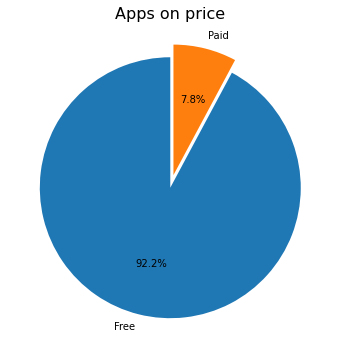

In [989]:
plt.figure(figsize=(8,6))
plt.title("Apps on price",fontsize = 16)
plt.pie(price_df.Type.value_counts(), labels=price_df.Type.value_counts().index,autopct='%1.1f%%',startangle=90,explode=(0, 0.1))
plt.show()


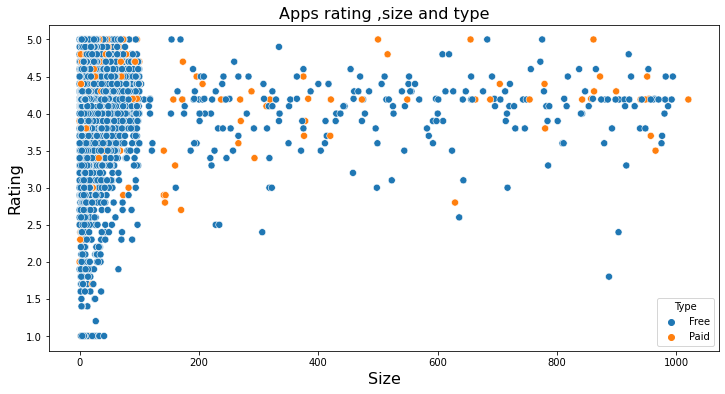

In [990]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=price_df,x=price_df['Size'],y=price_df['Rating'],hue=price_df['Type'],s=50)
plt.xlabel("Size",fontsize=16)
plt.ylabel("Rating",fontsize=16)
plt.title("Apps rating ,size and type",fontsize=16)
plt.show()

In [991]:
grouped = right_df[['App','Content Rating']]
grouped

,App,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


In [992]:
age_grouped= grouped.rename(columns={'Content Rating': 'age_group'})
age_grouped

,App,age_group
0,Photo Editor & Candy Camera & Grid & ScrapBook,Everyone
1,Coloring book moana,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Everyone
3,Sketch - Draw & Paint,Teen
4,Pixel Draw - Number Art Coloring Book,Everyone
...,...,...
10836,Sya9a Maroc - FR,Everyone
10837,Fr. Mike Schmitz Audio Teachings,Everyone
10838,Parkinson Exercices FR,Everyone
10839,The SCP Foundation DB fr nn5n,Mature 17+


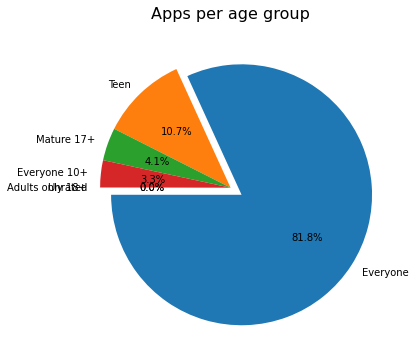

In [993]:
plt.figure(figsize=(10,6))
plt.title("Apps per age group",fontsize = 16)
plt.pie(age_grouped.age_group.value_counts(), labels=age_grouped.age_group.value_counts().index,autopct='%1.1f%%',startangle=180,explode=(0.1, 0,0,0,0,0))
plt.show()

In [994]:
versions=right_df["Android Ver"].value_counts().reset_index()
versions = versions.rename(columns={'index':'Android Ver','Android Ver': 'count'})
versions


,Android Ver,count
0,4.1 and up,2202
1,4.0.3 and up,1395
2,4.0 and up,1285
3,Varies with device,990
4,4.4 and up,818
5,2.3 and up,616
6,5.0 and up,512
7,4.2 and up,372
8,2.3.3 and up,273
9,2.2 and up,239


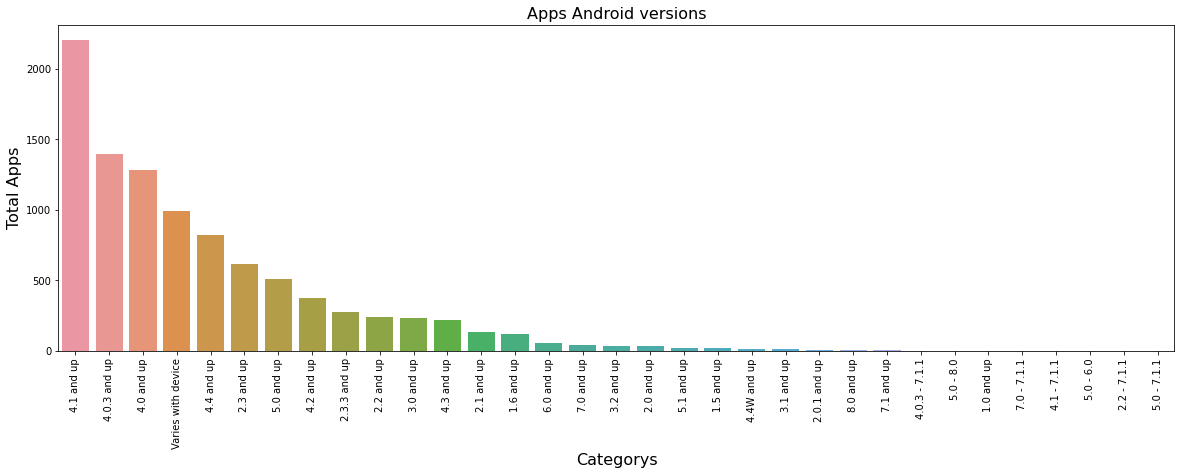

In [995]:
plt.figure(figsize=(20,6))
plt.title("Apps Android versions",fontsize=16)
sns.barplot(data=versions,x="Android Ver",y="count")
plt.xticks(rotation= 90)
plt.xlabel('Categorys',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()


In [996]:
df=right_df.groupby('Category')['App'].nunique().reset_index(name="Total Apps")
df=df.sort_values(by=['Total Apps'],ascending=False)
df

,Category,Total Apps
11,FAMILY,1832
14,GAME,959
29,TOOLS,827
4,BUSINESS,420
20,MEDICAL,395
23,PERSONALIZATION,376
25,PRODUCTIVITY,374
18,LIFESTYLE,369
12,FINANCE,345
28,SPORTS,325


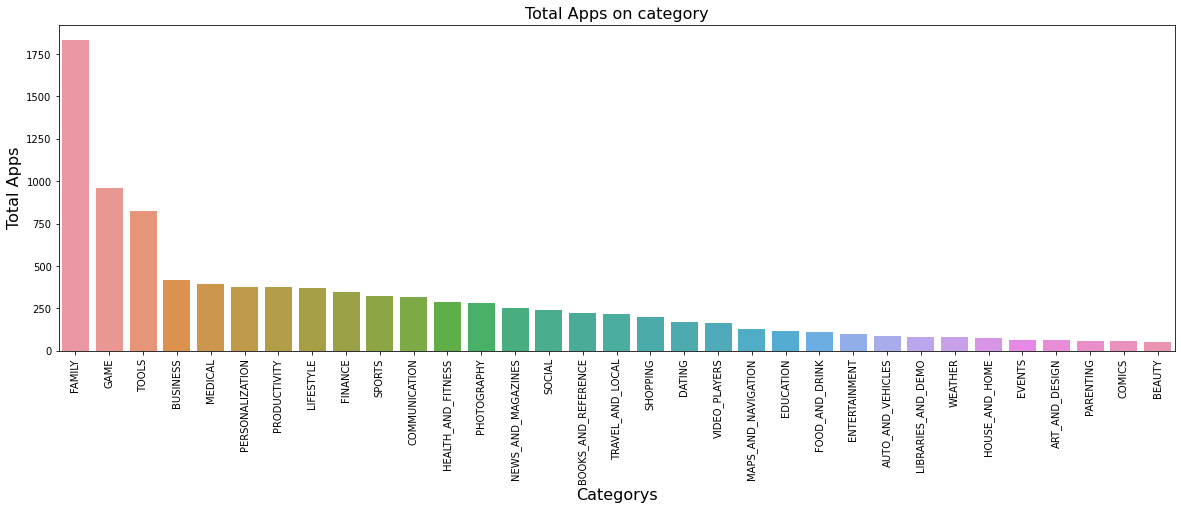

In [997]:
plt.figure(figsize=(20,6))
plt.title("Total Apps on category",fontsize=16)
sns.barplot(data=df,x="Category",y="Total Apps")
plt.xticks(rotation= 90)
plt.xlabel('Categorys',fontsize=16)
plt.ylabel('Total Apps',fontsize=16)
plt.show()

In [998]:
category=df.sort_values(by='Total Apps', ascending=False)
top_five_category=category.head()
least_five_category=category.tail()

In [999]:
top_five_category.reset_index()

,index,Category,Total Apps
0,11,FAMILY,1832
1,14,GAME,959
2,29,TOOLS,827
3,4,BUSINESS,420
4,20,MEDICAL,395


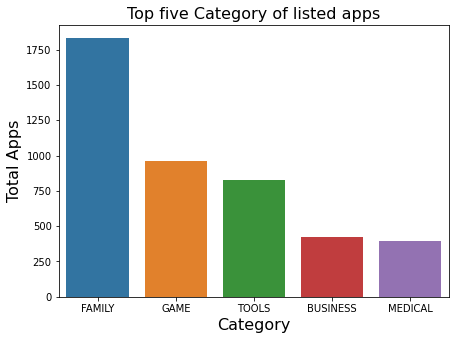

In [1000]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=top_five_category, x="Category", y="Total Apps")
plt.title("Top five Category of listed apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [1001]:
least_five_category.reset_index()

,index,Category,Total Apps
0,10,EVENTS,64
1,0,ART_AND_DESIGN,64
2,22,PARENTING,60
3,5,COMICS,56
4,2,BEAUTY,53


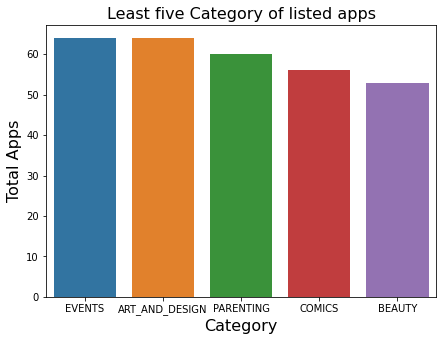

In [1038]:
fig = plt.figure(figsize = (7, 5))
sns.barplot(data=least_five_category, x="Category", y="Total Apps")
plt.title("Least five Category of listed apps",fontsize=16)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Total Apps",fontsize=16)
plt.show()

In [1003]:
categories= right_df.groupby('Category')["Installs"].sum().reset_index()
category_installs_sum_df=categories.sort_values(by='Installs', ascending=False)
category_installs_sum_df

,Category,Installs
14,GAME,13878924415
6,COMMUNICATION,11038276251
29,TOOLS,8001771915
25,PRODUCTIVITY,5793091369
27,SOCIAL,5487867902
24,PHOTOGRAPHY,4649147655
11,FAMILY,4427941505
31,VIDEO_PLAYERS,3926902720
30,TRAVEL_AND_LOCAL,2894887146
21,NEWS_AND_MAGAZINES,2369217760


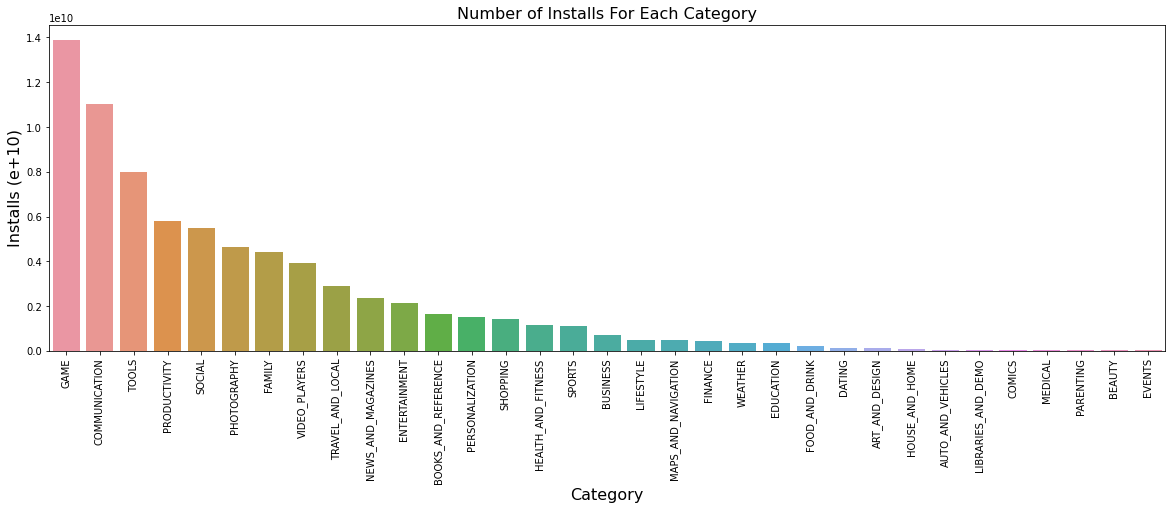

In [1004]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=16)
plt.ylabel('Installs (e+10)',fontsize=16)
plt.title('Number of Installs For Each Category',fontsize=16)
plt.show()

In [1005]:
df1 =right_df[["App","Category","Rating","Reviews","Installs","Price","Type","Genres","Content Rating","Size"]]
df1

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,10000,0.0,Free,Art & Design,Everyone,19.0
1,Coloring book moana,ART_AND_DESIGN,3.90,967,500000,0.0,Free,Art & Design;Pretend Play,Everyone,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,5000000,0.0,Free,Art & Design,Everyone,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,50000000,0.0,Free,Art & Design,Teen,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,100000,0.0,Free,Art & Design;Creativity,Everyone,2.8
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,5000,0.0,Free,Education,Everyone,53.0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,100,0.0,Free,Education,Everyone,3.6
10838,Parkinson Exercices FR,MEDICAL,4.19,3,1000,0.0,Free,Medical,Everyone,9.5
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,1000,0.0,Free,Books & Reference,Mature 17+,0.0


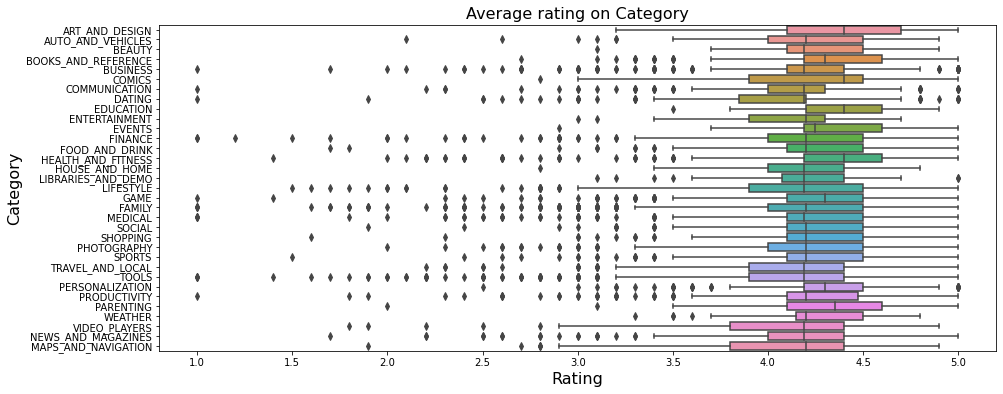

In [1006]:
plt.figure(figsize=(15,6))
plt.title("Average rating on Category",fontsize=16)
sns.boxplot(y="Category",x ='Rating',data =df1)
plt.xlabel("Rating",fontsize=16)
plt.ylabel("Category",fontsize=16)
plt.show()

In [1007]:
df2=df1[["Rating","Reviews","Installs","Size","Price"]]
df2

,Rating,Reviews,Installs,Size,Price
0,4.10,159,10000,19.0,0.0
1,3.90,967,500000,14.0,0.0
2,4.70,87510,5000000,8.7,0.0
3,4.50,215644,50000000,25.0,0.0
4,4.30,967,100000,2.8,0.0
...,...,...,...,...,...
10836,4.50,38,5000,53.0,0.0
10837,5.00,4,100,3.6,0.0
10838,4.19,3,1000,9.5,0.0
10839,4.50,114,1000,0.0,0.0


In [1008]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rating    9659 non-null   float64
 1   Reviews   9659 non-null   int64  
 2   Installs  9659 non-null   int64  
 3   Size      9659 non-null   float64
 4   Price     9659 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 710.8 KB


In [1009]:
rating_df = df2.groupby('Rating').sum().reset_index()
rating_df

,Rating,Reviews,Installs,Size,Price
0,1.00,28,5170,228.8,4.48
1,1.20,44,1000,27.0,0.00
2,1.40,98,7000,20.2,0.00
3,1.50,61,1105,54.0,0.00
4,1.60,691,152000,64.6,0.00
5,1.70,2360,81700,80.3,4.99
6,1.80,3418,519500,935.2,1.49
7,1.90,1874,189000,154.2,0.00
8,2.00,2997,5040150,191.4,4.59
9,2.10,3073,182000,164.2,0.00


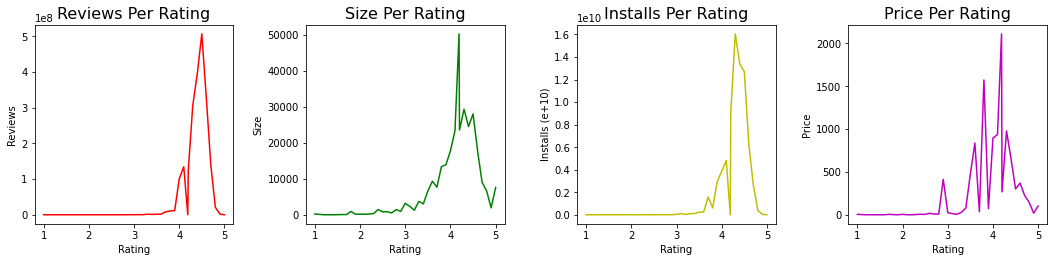

In [1010]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating',fontsize=16)

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating',fontsize=16)

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'y')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating',fontsize=16)

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'm')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating',fontsize=16)

plt.tight_layout(pad=2)
plt.show()

# **Observations**

In [1011]:
df1["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [1012]:
top_installers=df1.sort_values(by='Installs', ascending=False)
top_apps_by_instolation=top_installers.head(20)

In [1013]:
top_apps_by_instolation

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,0.0,Free,Communication,Everyone,0.0
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,1000000000,0.0,Free,Books & Reference,Teen,0.0
1654,Subway Surfers,GAME,4.5,27722264,1000000000,0.0,Free,Arcade,Everyone 10+,76.0
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,1000000000,0.0,Free,Travel & Local,Everyone,0.0
340,Gmail,COMMUNICATION,4.3,4604324,1000000000,0.0,Free,Communication,Everyone,0.0
2545,Instagram,SOCIAL,4.5,66577313,1000000000,0.0,Free,Social,Teen,0.0
2544,Facebook,SOCIAL,4.1,78158306,1000000000,0.0,Free,Social,Teen,0.0
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,0.0,Free,Communication,Everyone,0.0
2554,Google+,SOCIAL,4.2,4831125,1000000000,0.0,Free,Social,Teen,0.0
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,1000000000,0.0,Free,Video Players & Editors,Teen,0.0


In [1014]:
top_category_apps=top_apps_by_instolation.groupby("Category")["App"].count().reset_index(name="total app")
top_category_apps=top_category_apps.sort_values(by="total app",ascending=False)
top_category_apps

,Category,total app
1,COMMUNICATION,6
7,SOCIAL,3
9,TRAVEL_AND_LOCAL,2
10,VIDEO_PLAYERS,2
0,BOOKS_AND_REFERENCE,1
2,ENTERTAINMENT,1
3,GAME,1
4,NEWS_AND_MAGAZINES,1
5,PHOTOGRAPHY,1
6,PRODUCTIVITY,1


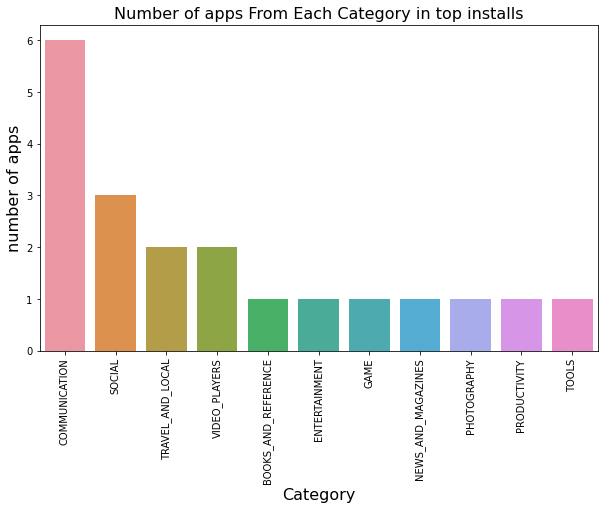

In [1015]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='total app', data=top_category_apps)
plt.xticks(rotation=90)
plt.xlabel("Category",fontsize=16)
plt.ylabel('number of apps',fontsize=16)
plt.title('Number of apps From Each Category in top installs',fontsize=16)
plt.show()

In [1016]:
apps_price=df1.sort_values(by='Price', ascending=False)

In [1017]:
apps_price.head()

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
4367,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,10000,400.00,Paid,Lifestyle,Everyone,7.3
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.19,0,0,399.99,Paid,Lifestyle,Everyone,40.0
5359,I am rich(premium),FINANCE,3.50,472,5000,399.99,Paid,Finance,Everyone,965.0
5358,I am Rich!,FINANCE,3.80,93,1000,399.99,Paid,Finance,Everyone,22.0
5373,I AM RICH PRO PLUS,FINANCE,4.00,36,1000,399.99,Paid,Finance,Everyone,41.0


In [1018]:
apps_Reviews=df1.sort_values(by='Reviews', ascending=False)
apps_Reviews.head()

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
2544,Facebook,SOCIAL,4.1,78158306,1000000000,0.0,Free,Social,Teen,0.0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,0.0,Free,Communication,Everyone,0.0
2545,Instagram,SOCIAL,4.5,66577313,1000000000,0.0,Free,Social,Teen,0.0
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,0.0,Free,Communication,Everyone,0.0
1670,Clash of Clans,GAME,4.6,44891723,100000000,0.0,Free,Strategy,Everyone 10+,98.0


In [1019]:
df = df1[df1['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
1654,Subway Surfers,GAME,4.5,27722264,1000000000,0.0,Free,Arcade,Everyone 10+,76.0
1655,Candy Crush Saga,GAME,4.4,22426677,500000000,0.0,Free,Casual,Everyone,74.0
1661,Temple Run 2,GAME,4.3,8118609,500000000,0.0,Free,Action,Everyone,62.0
1662,Pou,GAME,4.3,10485308,500000000,0.0,Free,Casual,Everyone,24.0
1722,My Talking Tom,GAME,4.5,14891223,500000000,0.0,Free,Casual,Everyone,0.0


In [1020]:
df = df1[df1['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head(5)

,App,Category,Rating,Reviews,Installs,Price,Type,Genres,Content Rating,Size
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1,50,1.49,Paid,Education,Everyone,2.0
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2,1000,0.00,Free,Education,Everyone,21.0
4127,Speech Therapy: F,FAMILY,1.0,1,10,2.99,Paid,Education,Everyone,16.0
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402,100000,0.00,Free,Entertainment,Everyone,1.7
9176,EB Mobile,FAMILY,1.7,1172,10000,0.00,Free,Education,Everyone,5.6


In [1031]:
Genres= df1.groupby("Genres")["Installs"].sum().reset_index()
Genres1= Genres.sort_values(by=['Installs'], ascending=False)
Genres1.head()

,Genres,Installs
35,Communication,11038276251
107,Tools,7991771915
81,Productivity,5793091369
100,Social,5487867902
80,Photography,4649147655


In [1032]:
Genres1.tail()

,Genres,Installs
21,Books & Reference;Education,11000
93,Role Playing;Education,100
112,Trivia;Education,100
18,Board;Pretend Play,100
20,Books & Reference;Creativity,100


# **Dataframe-2**

In [1023]:
ps_df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [1024]:
ps_df2.shape

(64295, 5)

In [1025]:
ps_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
